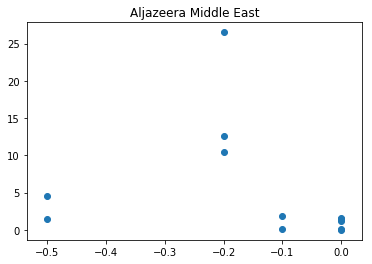

Sentiment Score: -1.800000011920929
Sentiment Magnitude 62.000000312924385
Aggregate Weighted Sentiment Score: -13.170000177174808


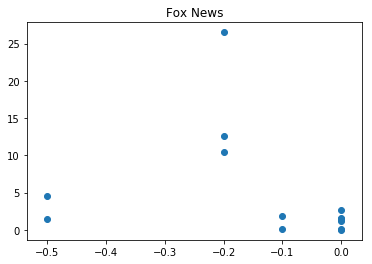

Sentiment Score: -1.800000011920929
Sentiment Magnitude 64.7000003606081
Aggregate Weighted Sentiment Score: -13.170000177174808


In [3]:
import re
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

directory = set()
keyword_articles = set()
#key_word = ["kill", "saudi", "iran"]
key_word = "saudi"
title_set = set()

class Article:
    def __init__(self, title, link, score, magnitude, weighted):
        self.title = title
        self.link = link
        self.score = score
        self.magnitude = magnitude
        self.weighted = weighted

def bbc_middleeast(directory, keyword_articles): 
    local_kwa = set()
    response = requests.get('https://www.bbc.com/news/world/middle_east')
    doc = BeautifulSoup(response.text, 'html.parser')
    headlines = doc.find_all('div')
    for headline in headlines:
        for a in headline.findAll('a'):
            href = a.get('href')
            title = a.text
            link = 'https://www.bbc.com' + href
            a = Article(title, link, None, None, None)
            if a != None:
                if(title not in title_set):
                    title_set.add(title)
                    directory.add(a)
                    
                    
    for article in directory:
        search = re.search("(saudi)", (article.title).lower())
        if search != None:
            local_kwa.add(article)
            keyword_articles.add(article)
    
    graph_sentiment(local_kwa, "BBC Middle East")
def der_spiegel(directory, keyword_articles):
    local_kwa = set()
    response = requests.get('http://www.spiegel.de/international/')
    doc = BeautifulSoup(response.text, 'html.parser')
    headlines = doc.find_all('a')
    for headline in headlines:
        if(headline.get('href') != None and headline.text != None):
            href = headline.get('href')
            if(href[0:4] != 'http'):
                link = 'http://www.spiegel.de' + href
            else:
                line = href
            title = headline.text
            a = Article(title, link, None, None, None)
            if(a != None):
                if(title not in title_set):
                    title_set.add(title)
                    directory.add(a)
    
    for article in directory:
        search = re.search("(saudi)", (article.title).lower())
        if search != None:
            keyword_articles.add(article)
            local_kwa.add(article)
    graph_sentiment(local_kwa, "Der Spiegel")
    
def aljazeera_middle_east(directory, keyword_articles):
    local_kwa = set()
    response = requests.get('https://www.aljazeera.com/topics/country/saudi-arabia.html')
    doc = BeautifulSoup(response.text, 'html.parser')
    headlines = doc.find_all('div')
    for headline in headlines:
        for a in headline.findAll('a'):
            href = a.get('href')
            title = a.text
            if title != None:
                if(href != '#'):
                    link = 'https://www.aljazeera.com/' + href
                    a = Article(title, link, None, None, None)
                    if a != None:
                        if(title not in title_set):
                            title_set.add(title)
                            directory.add(a)
    for article in directory:
        search = re.search("(saudi)", (article.title).lower())
        if search != None:
            keyword_articles.add(article)
            local_kwa.add(article)
    graph_sentiment(local_kwa, "Aljazeera Middle East")

def cnn_middle_east(directory, keyword_articles):
    local_kwa = set()
    response = requests.get('https://www.cnn.com/middle-east')
    doc = BeautifulSoup(response.text, 'html.parser')
    headlines = doc.find_all('a')
    for headline in headlines:
        href = headline.get('href')
        for s1 in headline.findAll('span'):
            title = s1.text
            if title != None:
                link = 'https://www.cnn.com' + href
                a = Article(title, link, None, None, None)
                if(title not in title_set):
                    title_set.add(title)
                    directory.add(a)
    for article in directory:
        search = re.search("(saudi)", (article.title).lower())
        if search != None:
            keyword_articles.add(article)
            local_kwa.add(article)
    graph_sentiment(local_kwa, "CNN")
    
def fox_news_middle_east(directory, keyword_articles):
    local_kwa = set()
    response = requests.get('https://www.foxnews.com/category/world/world-regions/middle-east')
    doc = BeautifulSoup(response.text, 'html.parser')
    headlines = doc.find_all('a')
    for headline in headlines:
        href = headline.get('href')
        for s1 in headline.findAll('img'):
            title = s1.get('alt')
            if title != None:
                link = 'https://www.foxnews.com/' + href
                a = Article(title, link, None, None, None)
                if(title not in title_set):
                    title_set.add(title)
                    directory.add(a)
    
    for article in directory:
        search = re.search("(saudi)", (article.title).lower())
        if search != None:
            keyword_articles.add(article)
            local_kwa.add(article)
    graph_sentiment(local_kwa, "Fox News")
    
    
#bbc_middleeast(directory, keyword_articles) #INDEX = 3
#der_spiegel(directory, keyword_articles) #INDEX = 1
#cnn_middle_east(directory, keyword_articles)
aljazeera_middle_east(directory, keyword_articles)
fox_news_middle_east(directory, keyword_articles)





In [2]:
from google.cloud.language import enums
from google.cloud.language import types
import os
from google.oauth2 import service_account
# Imports the Google Cloud client library
from google.cloud import language

def graph_sentiment(keyword_articles, title):
    count = 0
    used = [];
    aggregate_weighted_score = 0
    aggregate_sentiment_score = 0
    aggregate_magnitude = 0
    score = []
    magnitude = []



    for article in keyword_articles:
        if article.link not in used:
            count = count + 1
            page = requests.get(article.link)
            soup = BeautifulSoup(page.content, 'html.parser')


            body = list(soup.children)[1]

            #list(body.children)[1]

            text = ''
            for p in soup.find_all('p'):
                if p.get('class') == None:
                    text = text + p.get_text()
            credentials = service_account.Credentials.from_service_account_file("/Users/DJ/Desktop/Pangaea/pangaea_key.json")
            client = language.LanguageServiceClient(credentials=credentials)

            document = types.Document(content=text,type=enums.Document.Type.PLAIN_TEXT)

            sentiment = client.analyze_sentiment(document=document).document_sentiment
    #         print(article.title)
    #         print(article.link)
    #         print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))
    #         total_sentiment_score += sentiment.score
    #         total_sentiment_magnitude += sentiment.magnitude


            weighted_sentiment = sentiment.score * sentiment.magnitude
            
            article.score = sentiment.score
            article.magnitude = sentiment.magnitude
            article.weighted = weighted_sentiment
            
            score.append(sentiment.score)
            magnitude.append(sentiment.magnitude)
            aggregate_sentiment_score += sentiment.score
            aggregate_magnitude += sentiment.magnitude
            aggregate_weighted_score += weighted_sentiment
            #print(article.title, article.link, article.score, article.magnitude, article.weighted)
            used.append(article.link);
            
    get_ipython().run_line_magic('matplotlib', 'inline')
    plt.scatter(score, magnitude)
    plt.title(title)
    plt.show()
    print("Sentiment Score:", aggregate_sentiment_score)
    print("Sentiment Magnitude", aggregate_magnitude)
    print("Aggregate Weighted Sentiment Score:", aggregate_weighted_score)